In [2]:
#LIBRERIAS A UTILIZAR
import tensorflow as tf
import tensorflow.keras as kr
import keras
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math as mth
import random as random

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
#DECLARACION DE CLASES
#Los vectores de 16 elementos se llaman "pixels" porque son un conjunto de elementos "pixel"
#Voy a generar un vector "dataset" que es un vector de 10000 elemenos de tipo "pixels"

class pixel:
    #esta es la clase pixel, contiene seis canales (C1 C2 C3 C4 C5 C6) de enteros de rango 0 a 255 cada uno
    #Cada canal varia sinusoidalmente con parametros aleatorios
    def __init__(self,tiempo, a=0, b=0,A=127,frec1 = 0.05,frec2 = 2, frec3 = 1, frec4 = 0.3, frec5 = 0.8, frec6 = 0.06):
        self.C1 = mth.floor((A * mth.sin(frec1*tiempo + a)) + (A+1) + b) #Aqui genero los seis canales del pixel
        self.C2 = mth.floor((A * mth.sin(frec2*tiempo + a)) + (A+1) + b)
        self.C3 = mth.floor((A * mth.sin(frec3*tiempo + a)) + (A+1) + b)
        self.C4 = mth.floor((A * mth.sin(frec4*tiempo + a)) + (A+1) + b)
        self.C5 = mth.floor((A * mth.sin(frec5*tiempo + a)) + (A+1) + b)
        self.C6 = mth.floor((A * mth.sin(frec6*tiempo + a)) + (A+1) + b)
        #Esto se hace para que los valores sigan dentro del rango 0-255 (si se pasan deben saturar):
        if self.C1 > 255: 
            self.C1 = 255
        if self.C2 > 255: 
            self.C2 = 255
        if self.C3 > 255: 
            self.C3 = 255
        if self.C4 > 255: 
            self.C4 = 255
        if self.C5 > 255: 
            self.C5 = 255
        if self.C6 > 255: 
            self.C6 = 255
        if self.C1 < 0: 
            self.C1 = 0
        if self.C2 < 0: 
            self.C2 = 0
        if self.C3 < 0: 
            self.C3 = 0
        if self.C4 < 0: 
            self.C4 = 0
        if self.C5 < 0: 
            self.C5 = 0
        if self.C6 < 0: 
            self.C6 = 0
    def getData(self): #Esto es para visualizar rapido en caso de que sea necesario
        print("C1:",self.C1, "C2:",self.C2, "C3:", self.C3,"C4:",self.C4, "C5:",self.C5, "C6:", self.C6)
        
        
    def setData(self,tiempo, a1=0, a2=0,a3=0, a4=0,a5=0, a6=0,b=0,A1=127,A2=127,A3=127,A4=127,A5=127,A6=127,frec1 = 0.05,frec2 = 2, frec3 = 1, frec4 = 0.3, frec5 = 0.8, frec6 = 0.06):
        self.C1 = mth.floor((A1 * mth.sin(frec1*tiempo + a1)) + (A1+1) + b) #Aqui seteo los seis canales del pixel
        self.C2 = mth.floor((A2 * mth.sin(frec2*tiempo + a2)) + (A2+1) + b)
        self.C3 = mth.floor((A3 * mth.sin(frec3*tiempo + a3)) + (A3+1) + b)
        self.C4 = mth.floor((A4 * mth.sin(frec4*tiempo + a4)) + (A4+1) + b)
        self.C5 = mth.floor((A5 * mth.sin(frec5*tiempo + a5)) + (A5+1) + b)
        self.C6 = mth.floor((A6 * mth.sin(frec6*tiempo + a6)) + (A6+1) + b)
        
class pixels(list): #Esta es la clase de 16 elementos (cada elemento es un pixel)
    def fillWithPixels(self, cantElementos = 16):
        a1 = mth.floor(random.uniform(0,10)) #Aqui esta la aleatoriedad necesaria para entrenar bien
        a2 = mth.floor(random.uniform(0,10))
        a3 = mth.floor(random.uniform(0,10))
        a4 = mth.floor(random.uniform(0,10))
        a5 = mth.floor(random.uniform(0,10))
        a6= mth.floor(random.uniform(0,10))
        A1 = mth.floor(random.uniform(5,127))
        A2 = mth.floor(random.uniform(5,127))
        A3 = mth.floor(random.uniform(5,127))
        A4 = mth.floor(random.uniform(5,127))
        A5 = mth.floor(random.uniform(5,127))
        A6 = mth.floor(random.uniform(5,127))
        frec1=random.uniform(0.02,2)
        frec2=random.uniform(0.02,2)
        frec3=random.uniform(0.02,2)
        frec4=random.uniform(0.02,2)
        frec5=random.uniform(0.02,2)
        frec6=random.uniform(0.02,2)
        b=random.uniform(0,5)
        
        #print("a1: ", a1, "A1: ", A1, "frec1: ", frec1, "b", b)
        k = 0
        for x in range(cantElementos*10):
            #print("Iteracion numero ", x)
            if(x % 10 == 0):
                self.append(pixel(x))
                self[k].setData(x,a1,a2,a3,a4,a5,a6,b,A1,A2,A3,A4,A5,A6,frec1,frec2,frec3,frec4,frec5,frec6)
                k = k + 1
                #print("x: ",x)

In [4]:
#prueba:
X = pixels()
X.fillWithPixels()
X[0].getData()
X[1].getData()
X[2].getData()
X[3].getData()
X[4].getData()
X[5].getData()
X[6].getData()
X[7].getData()
X[8].getData()
X[9].getData()
X[10].getData()
X[11].getData()
X[12].getData()
X[13].getData()
X[14].getData()
X[15].getData()

C1: 164 C2: 17 C3: 70 C4: 66 C5: 2 C6: 99
C1: 142 C2: 122 C3: 8 C4: 36 C5: 4 C6: 33
C1: 75 C2: 79 C3: 125 C4: 20 C5: 16 C6: 17
C1: 14 C2: 2 C3: 82 C4: 76 C5: 32 C6: 98
C1: 6 C2: 94 C3: 4 C4: 2 C5: 41 C6: 38
C1: 57 C2: 113 C3: 117 C4: 66 C5: 37 C6: 14
C1: 128 C2: 8 C3: 95 C4: 35 C5: 24 C6: 96
C1: 165 C2: 57 C3: 1 C4: 21 C5: 8 C6: 43
C1: 139 C2: 130 C3: 107 C4: 75 C5: 1 C6: 11
C1: 70 C2: 35 C3: 106 C4: 2 C5: 6 C6: 94
C1: 11 C2: 22 C3: 1 C4: 67 C5: 21 C6: 48
C1: 8 C2: 126 C3: 96 C4: 34 C5: 35 C6: 8
C1: 62 C2: 72 C3: 116 C4: 22 C5: 41 C6: 92
C1: 132 C2: 3 C3: 3 C4: 75 C5: 34 C6: 53
C1: 165 C2: 101 C3: 84 C4: 1 C5: 19 C6: 6
C1: 135 C2: 107 C3: 124 C4: 68 C5: 5 C6: 89


In [5]:
#GENERACION DEL DATASET DE ENTRENAMIENTO
#Quiero una lista de 10000 elementos. Cada elemento es un vector de pixels. Es decir dataset1 y dataset2 son listas de 10000 elementos de pixels.
#Cada uno de ellos es un conjunto de 16 elementos pixel, cada uno con sus 6 canales

size = 10000
dataset1 = [] #Para entrenamiento
dataset2 = [] #Para testeo

for x in range(size):
    dataset1.append(pixels())
    dataset1[x].fillWithPixels()
    dataset2.append(pixels())
    dataset2[x].fillWithPixels()

    
#prueba de que anda todo bien hasta aqui:

dataset1[258][4].getData()

C1: 40 C2: 91 C3: 72 C4: 116 C5: 32 C6: 81


In [6]:
#PREPARACION DEL DATASET PARA ENTRENAMIENTO
#Aqui voy a preparar el dataset para que sea compatible con la red y pueda ser usado para entrenarla:
#Seguramente tenga que convertir todo a tensores con las librerias scipy y/o numpy

dataset1_np = np.array(dataset1) #Para entrenar
dataset2_np = np.array(dataset2) #Para testear

timesteps = 15 #esta es la cantidad de entradas que le vamos a dar a la red para que luego prediga la ultima



#------------------------------------inicio definicion inicial------------------------------------------
train = np.zeros(size*16*6)
test = np.zeros(size*16*6) 
y_train = np.zeros(size*1*6) #El 6 es por 6 canales, 
y_test = np.zeros(size*1*6) 
x_train = np.zeros((size*timesteps*6))
x_test = np.zeros((size*timesteps*6))

train = train.reshape(size,16,6)
test = train.reshape(size,16,6)
y_train = y_train.reshape(size,1,6) #el 1 es porque es solo un tiempo el que hay que predecir (el ultimo)
y_test = y_test.reshape(size,1,6)
x_train = x_train.reshape(size,timesteps,6)
x_test = x_test.reshape(size,timesteps,6)
#----------------------------------------fin de definicion inicial--------------------------------------------

k = 0


for i in range(size):
    for j in range (16):
        train[i][j][0] = dataset1_np[i][j].C1
        train[i][j][1] = dataset1_np[i][j].C2
        train[i][j][2] = dataset1_np[i][j].C3
        train[i][j][3] = dataset1_np[i][j].C4
        train[i][j][4] = dataset1_np[i][j].C5
        train[i][j][5] = dataset1_np[i][j].C6
        test[i][j][0] = dataset2_np[i][j].C1
        test[i][j][1] = dataset2_np[i][j].C2
        test[i][j][2] = dataset2_np[i][j].C3
        test[i][j][3] = dataset2_np[i][j].C4
        test[i][j][4] = dataset2_np[i][j].C5
        test[i][j][5] = dataset2_np[i][j].C6
        if j == 15:
            y_train[k][0][0] = train[i][j][0]
            y_train[k][0][1] = train[i][j][1] 
            y_train[k][0][2] = train[i][j][2] 
            y_train[k][0][3] = train[i][j][3] 
            y_train[k][0][4] = train[i][j][4] 
            y_train[k][0][5] = train[i][j][5] 
            y_test[k][0][0] = test[i][j][0]
            y_test[k][0][1] = test[i][j][1]
            y_test[k][0][2] = test[i][j][2]
            y_test[k][0][3] = test[i][j][3]
            y_test[k][0][4] = test[i][j][4]
            y_test[k][0][5] = test[i][j][5]
            
            k = k + 1
            
for i in range(size):
    for j in range (16):
        if j != 15:
            x_train[i][j] = train[i][j]
            x_test[i][j] = test[i][j]

y_train = y_train.reshape(10000,6)
y_test = y_test.reshape(10000,6)


#LISTO, ahora con x_train y y_train se entrenara la red. Con x_test y y_test se la testeará

In [7]:
#DEFINICION DE ARQUITECTURA DE RED NEURONAL

model = Sequential() #Creo la red neuronal
#input_dim = 256 #es el numero de entrada posible mas grande + 1, segun documentacion de keras
#model.add(Embedding(input_dim, output_dim=256, input_length=7)) #Agrego la capa embedding. Suele ser la primer capa de un red en keras, siempre.
model.add(LSTM(200, activation='relu', input_shape=(15,6))) #15 entradas de 6 caracteristicas cada una. 


model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5)) #Agrego capa de Dropout
model.add(Dense(6, activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#COMPILACION DE LA RED


optimizador = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#optimizador = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=optimizador,
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               165600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 186,306
Trainable params: 186,306
Non-trainable params: 0
_________________________________________________________________


In [9]:
#ENTRENAMIENTO DE LA RED
history = model.fit(x_train, y_train, validation_data=(x_test, y_test) ,epochs=100)


#model.save_weights('first_try.h5') # Accuracy del 90% en el validation set y 88% en el test set
#model.save('primer_intento') #

model.save_weights('second_try.h5') # 
model.save('segundo_intento') #

score = model.evaluate(x_test, y_test)
score

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 14s 1ms/step - loss: 3582.2342 - acc: 0.3329 - val_loss: 3585.5816 - val_acc: 0.3423
Epoch 2/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3194.5602 - acc: 0.3708 - val_loss: 3103.5447 - val_acc: 0.3859
Epoch 3/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3096.5680 - acc: 0.3818 - val_loss: 3057.2027 - val_acc: 0.3852
Epoch 4/100
10000/10000 [==============================] - 12s 1ms/step - loss: 3018.1114 - acc: 0.3949 - val_loss: 2947.4119 - val_acc: 0.4059
Epoch 5/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2991.3953 - acc: 0.3975 - val_loss: 3011.5239 - val_acc: 0.4157
Epoch 6/100
10000/10000 [==============================] - 12s 1ms/step - loss: 2884.4672 - acc: 0.4222 - val_loss: 2753.8217 - val_acc: 0.4523
Epoch 7/100
10000/10000 [=============

Epoch 56/100
10000/10000 [==============================] - 12s 1ms/step - loss: 112.4631 - acc: 0.9069 - val_loss: 107.3887 - val_acc: 0.9095
Epoch 57/100
10000/10000 [==============================] - 12s 1ms/step - loss: 109.7438 - acc: 0.9083 - val_loss: 105.6254 - val_acc: 0.9115
Epoch 58/100
10000/10000 [==============================] - 12s 1ms/step - loss: 109.7233 - acc: 0.9134 - val_loss: 110.1194 - val_acc: 0.9154
Epoch 59/100
10000/10000 [==============================] - 12s 1ms/step - loss: 104.8887 - acc: 0.9122 - val_loss: 115.5497 - val_acc: 0.9195
Epoch 60/100
10000/10000 [==============================] - 12s 1ms/step - loss: 104.1929 - acc: 0.9122 - val_loss: 153.5446 - val_acc: 0.8961
Epoch 61/100
10000/10000 [==============================] - 12s 1ms/step - loss: 102.6262 - acc: 0.9138 - val_loss: 113.1401 - val_acc: 0.9054
Epoch 62/100
10000/10000 [==============================] - 12s 1ms/step - loss: 99.7413 - acc: 0.9129 - val_loss: 98.1881 - val_acc: 0.9147
E

[76.41542838134765, 0.9318]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


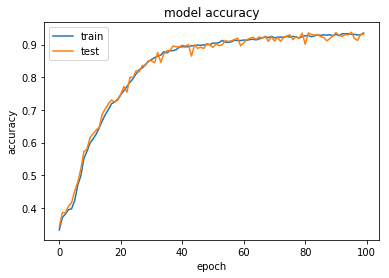

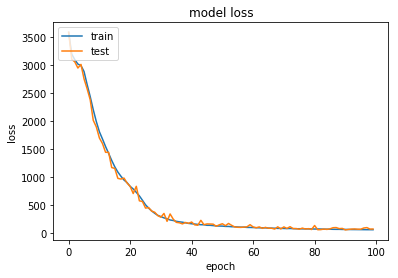

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediccion:  [[ 94. 203. 170.  55.  -0.  36.]]
valor posta:  [ 82. 201. 162.  53.   5.  24.]


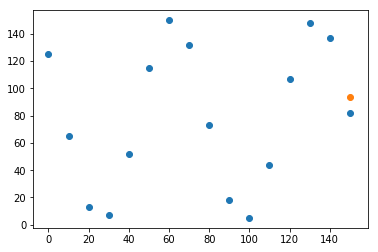

In [23]:
#AHORA PRUEBO CON VALORES FUERA DEL DATASET DE TRAINING
#(correr este bloque repetidas veces y verificar que la prediccion y el valor verdadero se parecen)
del X
X = pixels()
X.fillWithPixels()
Z = np.zeros(1*16*6)
Z = Z.reshape(1,16,6)

for i in range(16):
    for j in range(6):
        if j == 0:
            Z[0][i][j] = X[i].C1
        if j == 1:
            Z[0][i][j] = X[i].C2
        if j == 2:
            Z[0][i][j] = X[i].C3
        if j == 3:
            Z[0][i][j] = X[i].C4
        if j == 4:
            Z[0][i][j] = X[i].C5
        if j == 5:
            Z[0][i][j] = X[i].C6 

entrada = Z[0][:15]
entrada = entrada.reshape(1,15,6)
Y = np.round(model.predict(entrada))
print("prediccion: ",Y)
print("valor posta: ",Z[0][15])

#PLOTEO EL PRIMER CANAL

absisas = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
Canal1 = np.zeros(16)

for i in range(16):
    Canal1[i] = Z[0][i][0]

plt.scatter(absisas,Canal1)
plt.scatter(150,Y[0][0])